In [1]:
import numpy as np
import matplotlib.pyplot as plt

/home/arpit/workspace/arpit/swe-math-weekly/5/venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
def comfort_score(T, H, O):
    """
    Calculate the comfort score based on temperature, humidity, and occupancy.
    
    Args:
        T (float): Temperature in Fahrenheit
        H (float): Humidity percentage
        O (int): Number of occupants
        
    Returns:
        float: Comfort score
    """
    return 72 - (T - 70)**2 - 2*(H - 40)**2 + 5*O
    
def partial_derivatives(T, H, O):
    """
    Calculate partial derivatives of the comfort function with respect to each variable.
    
    Args:
        T (float): Temperature in Fahrenheit
        H (float): Humidity percentage
        O (int): Number of occupants
        
    Returns:
        tuple: (dC/dT, dC/dH, dC/dO)
    """
    # Partial derivative with respect to Temperature
    dC_dT = -2 * (T - 70)
    
    # Partial derivative with respect to Humidity
    dC_dH = -4 * (H - 40)
    
    # Partial derivative with respect to Occupancy
    dC_dO = 5
    
    return dC_dT, dC_dH, dC_dO
    
def analyze_sensitivity(T, H, O):
    """
    Analyze which variable has the greatest impact on comfort at the given point.
    
    Args:
        T (float): Temperature in Fahrenheit
        H (float): Humidity percentage
        O (int): Number of occupants
        
    Returns:
        tuple: (factor to adjust, magnitude of impact, detailed analysis)
    """
    # Calculate partial derivatives
    dC_dT, dC_dH, dC_dO = partial_derivatives(T, H, O)
    
    # Calculate current comfort score
    current_comfort = comfort_score(T, H, O)
    
    # Create dictionary of impacts
    impacts = {
        'Temperature': dC_dT,
        'Humidity': dC_dH,
        'Occupancy': dC_dO
    }

    abs_impacts = {
        'Temperature': abs(dC_dT),
        'Humidity': abs(dC_dH),
        'Occupancy': abs(dC_dO)
    }
    
    # Find factor with maximum impact
    max_impact_factor = max(abs_impacts, key=abs_impacts.get)
    max_abs_impact_value = abs_impacts[max_impact_factor]
    
    # Create detailed analysis
    analysis = {
        'current_comfort': current_comfort,
        'derivatives': {
            'Temperature': dC_dT,
            'Humidity': dC_dH,
            'Occupancy': dC_dO
        },
        'impacts': impacts,
        'recommendation': {
            'factor': max_impact_factor,
            'magnitude': max_abs_impact_value,
            'direction': 'increase' if impacts[max_impact_factor] > 0 else 'decrease'
        }
    }
    
    return max_impact_factor, max_abs_impact_value, analysis

def analyze(T, H, O):
    factor, impact, analysis = analyze_sensitivity(T, H, O)
        
    # Print results
    print(f"\nCurrent Comfort Score: {analysis['current_comfort']:.2f}")
    print("\nPartial Derivatives (Rate of Change):")
    for var, deriv in analysis['derivatives'].items():
        print(f"{var}: {deriv:.2f}")
    
    print("\nAbsolute Impacts:")
    for var, imp in analysis['impacts'].items():
        print(f"{var}: {imp:.2f}")
    
    print(f"\nRecommendation:")
    print(f"Adjust: {factor}")
    print(f"Impact Magnitude: {impact:.2f}")
    print(f"Direction: {analysis['recommendation']['direction']}")

In [3]:
def plot(T0, H0, O0):
    # Generate values around the current state
    T_values = np.linspace(65, 80, 100)
    H_values = np.linspace(30, 60, 100)
    O_values = np.arange(0, 5, 1)
    
    # Compute comfort scores for each change
    C_T = [comfort_score(T, H0, O0) for T in T_values]
    C_H = [comfort_score(T0, H, O0) for H in H_values]
    C_O = [comfort_score(T0, H0, O) for O in O_values]
    
    # Plotting
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(T_values, C_T, label='Comfort vs Temperature', color='r')
    plt.axvline(T0, linestyle='--', color='k', alpha=0.5)
    plt.xlabel('Temperature (°F)')
    plt.ylabel('Comfort Score')
    plt.legend()
    
    plt.subplot(1, 3, 2)
    plt.plot(H_values, C_H, label='Comfort vs Humidity', color='b')
    plt.axvline(H0, linestyle='--', color='k', alpha=0.5)
    plt.xlabel('Humidity (%)')
    plt.legend()
    
    plt.subplot(1, 3, 3)
    plt.plot(O_values, C_O, label='Comfort vs Occupancy', color='g', marker='o')
    plt.axvline(O0, linestyle='--', color='k', alpha=0.5)
    plt.xlabel('Occupancy')
    plt.legend()
    
    plt.suptitle('Impact of Environmental Factors on Comfort')
    plt.tight_layout()
    plt.show()

In [4]:
analyze(74, 45, 2)


Current Comfort Score: 16.00

Partial Derivatives (Rate of Change):
Temperature: -8.00
Humidity: -20.00
Occupancy: 5.00

Absolute Impacts:
Temperature: -8.00
Humidity: -20.00
Occupancy: 5.00

Recommendation:
Adjust: Humidity
Impact Magnitude: 20.00
Direction: decrease


In [5]:
analyze(0, 50, 2)


Current Comfort Score: -5018.00

Partial Derivatives (Rate of Change):
Temperature: 140.00
Humidity: -40.00
Occupancy: 5.00

Absolute Impacts:
Temperature: 140.00
Humidity: -40.00
Occupancy: 5.00

Recommendation:
Adjust: Temperature
Impact Magnitude: 140.00
Direction: increase


In [6]:
analyze(500, 50, 2)


Current Comfort Score: -185018.00

Partial Derivatives (Rate of Change):
Temperature: -860.00
Humidity: -40.00
Occupancy: 5.00

Absolute Impacts:
Temperature: -860.00
Humidity: -40.00
Occupancy: 5.00

Recommendation:
Adjust: Temperature
Impact Magnitude: 860.00
Direction: decrease


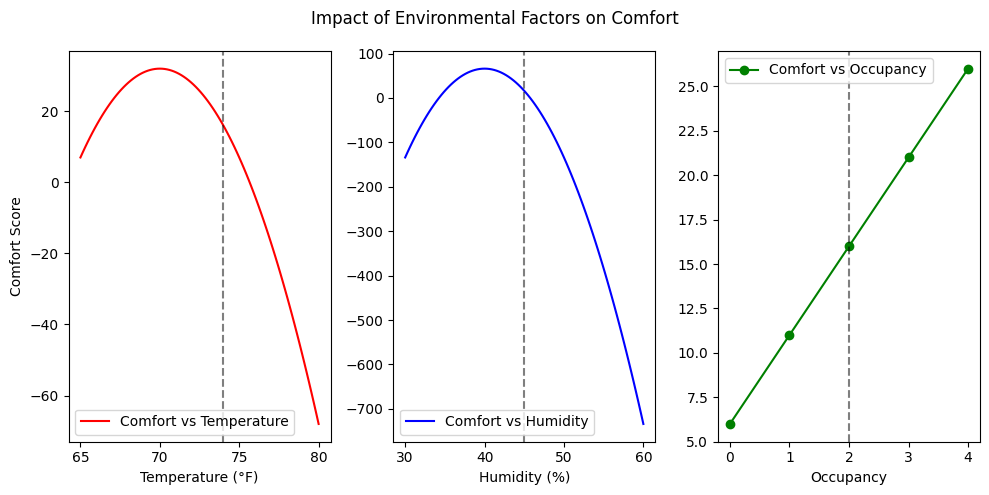

In [7]:
plot(74, 45, 2)